# Mice Protein Expression

## Context
Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome mice exposed to context fear conditioning, a task used to assess associative learning.

## Content
The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse.

The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.

## Classes:

- c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
- c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
- c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
- c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)
- t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
- t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
- t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
- t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)



## Attribute Information
[1] Mouse ID

[2:78] Values of expression levels of 77 proteins; the names of proteins are followed by N indicating that they were measured in the nuclear fraction. For example: DYRK1A_n

[79] Genotype: control (c) or trisomy (t)

[80] Treatment type: memantine (m) or saline (s)

[81] Behavior: context-shock (CS) or shock-context (SC)

[82] Class: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m

## Acknowledgements
Clara Higuera Department of Software Engineering and Artificial Intelligence, Faculty of Informatics and the Department of Biochemistry and Molecular Biology, Faculty of Chemistry, University Complutense, Madrid, Spain.
Email: clarahiguera at ucm.es

Katheleen J. Gardiner, creator and owner of the protein expression data, is currently with the Linda Crnic Institute for Down Syndrome, Department of Pediatrics, Department of Biochemistry and Molecular Genetics, Human Medical Genetics and Genomics, and Neuroscience Programs, University of Colorado, School of Medicine, Aurora, Colorado, USA.
Email: katheleen.gardiner at ucdenver.edu

Krzysztof J. Cios is currently with the Department of Computer Science, Virginia Commonwealth University, Richmond, Virginia, USA, and IITiS Polish Academy of Sciences, Poland.
Email: kcios at vcu.edu

## Source: 
- UC Irvine Machine Learning Repository

## Inspiration
The aim is to identify subsets of proteins that are discriminant between the classes.

In [ ]:
# magic function
%matplotlib inline

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, balanced_accuracy_score
from datetime import datetime
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

# Hiding warnings during display of plots
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
start=datetime.now()

In [ ]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls

--2021-08-06 07:42:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1628672 (1.6M) [application/x-httpd-php]
Saving to: ‘Data_Cortex_Nuclear.xls’

Data_Cortex_Nuclear 100%[===================>]   1.55M  3.43MB/s    in 0.5s    

2021-08-06 07:42:57 (3.43 MB/s) - ‘Data_Cortex_Nuclear.xls’ saved [1628672/1628672]



In [ ]:
data = pd.read_excel("Data_Cortex_Nuclear.xls")

In [ ]:
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

In [ ]:
data.shape

(1080, 82)

In [ ]:
data.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [ ]:
data['class'].value_counts()

c-CS-m    150
c-SC-m    150
t-SC-s    135
t-SC-m    135
t-CS-m    135
c-CS-s    135
c-SC-s    135
t-CS-s    105
Name: class, dtype: int64

In [ ]:
# Finding duplicate row(s)
data[data.duplicated() == True]

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class


### Filling Missing Values

In [ ]:
data.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [ ]:
# Getting columns which have missing values
nan_columns = (data.columns[data.isnull().any()])

# Getting the mean values from columns which have missing values
mean_values_columns = [data[column].mean() for column in nan_columns]

# Zipping together as dictionary
values_to_fillna = dict(zip(nan_columns, mean_values_columns))

# Filling missing values of each columns with their respective average or mean
data = data.fillna(values_to_fillna)

### Droping unnessary columns and renaming columns

In [ ]:
data.drop(columns=['Genotype', 'Treatment', 'Behavior', 'MouseID'], 
          inplace=True)

# Making a dictionary to replace old column names
# with new "more readable" ones
# e.g., protein_number

new_colum_names = dict(
    zip(
        data.columns[:-1], 
        [f"protein_{idx+1}" for idx in range(len(data.columns[:-1]))]
        )
    )

data.rename(columns = new_colum_names, inplace=True)

### Numerical labelling of classes 

In [ ]:
old_class_names = dict(data['class'].value_counts())

encoder = LabelEncoder()

data['class'] = encoder.fit_transform(data['class'])

new_class_names = dict(data['class'].value_counts())

replaced_classes = dict(zip(new_class_names.keys(), old_class_names.keys()))

print(replaced_classes)

{2: 'c-CS-m', 0: 'c-SC-m', 7: 't-SC-s', 6: 't-SC-m', 4: 't-CS-m', 3: 'c-CS-s', 1: 'c-SC-s', 5: 't-CS-s'}


In [ ]:
data.head()

,protein_1,protein_2,protein_3,protein_4,protein_5,protein_6,protein_7,protein_8,protein_9,protein_10,protein_11,protein_12,protein_13,protein_14,protein_15,protein_16,protein_17,protein_18,protein_19,protein_20,protein_21,protein_22,protein_23,protein_24,protein_25,protein_26,protein_27,protein_28,protein_29,protein_30,protein_31,protein_32,protein_33,protein_34,protein_35,protein_36,protein_37,protein_38,protein_39,protein_40,protein_41,protein_42,protein_43,protein_44,protein_45,protein_46,protein_47,protein_48,protein_49,protein_50,protein_51,protein_52,protein_53,protein_54,protein_55,protein_56,protein_57,protein_58,protein_59,protein_60,protein_61,protein_62,protein_63,protein_64,protein_65,protein_66,protein_67,protein_68,protein_69,protein_70,protein_71,protein_72,protein_73,protein_74,protein_75,protein_76,protein_77,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.134762,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,0.134762,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,0.134762,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312

## Building Random Model

In [ ]:
palette = sns.color_palette("Paired", 8)
plt.style.use('seaborn-notebook')

In [ ]:
X = data[data.columns[:-1]]
y = data['class']

In [ ]:
# Preprocessing

X = RobustScaler().fit_transform(X)

In [ ]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y)

In [ ]:
x_train.shape

(756, 77)

In [ ]:
x_test.shape

(324, 77)

In [ ]:
# Reducing dimension and projecting it onto 2D with t-SNE
train_tsne = TSNE(n_components=2, perplexity=50, n_jobs=-1).fit_transform(x_train) 

# Reducing dimension and projecting it onto 2D with t-SNE
test_tsne = TSNE(n_components=2, perplexity=50, n_jobs=-1).fit_transform(x_test)

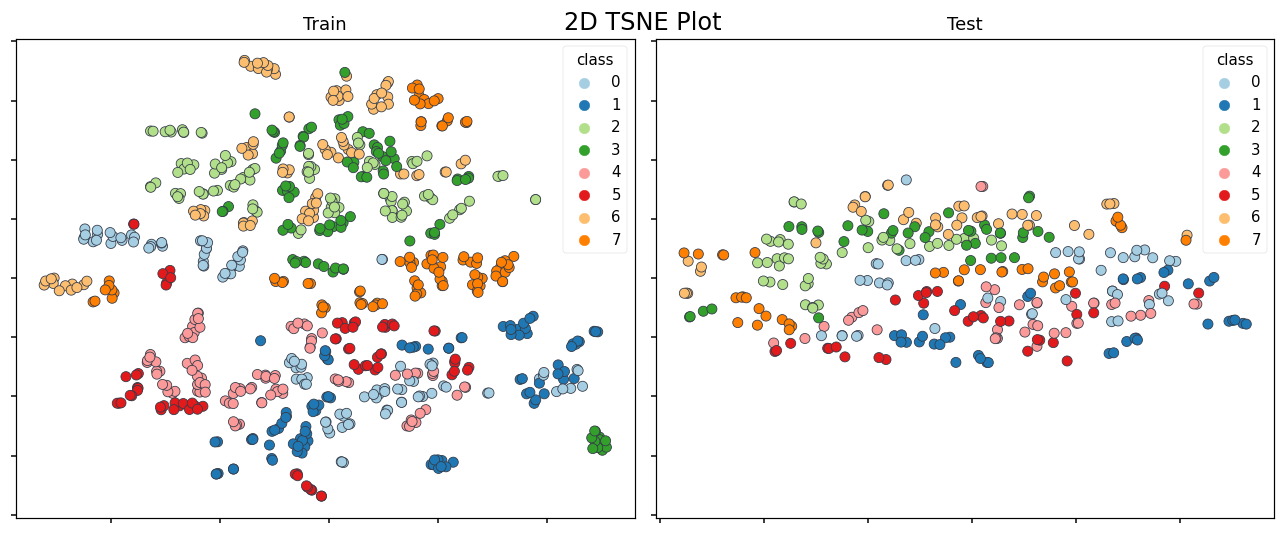

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=108, sharey=True)
fig.suptitle('2D TSNE Plot', fontsize=16)

sns.scatterplot(ax=axes[0], x=train_tsne[:,0], y=train_tsne[:,1], 
                edgecolor='#353b48', hue=y_train, legend='full', 
                palette=palette, s=45)
axes[0].set_title("Train")
axes[0].set_yticklabels([])
axes[0].set_xticklabels([])
axes[0].grid(False)

sns.scatterplot(ax=axes[1], x=test_tsne[:,0], y=test_tsne[:,1], 
                edgecolor='#353b48', palette=palette,
                hue=y_test, legend='full', s=45)
axes[1].set_title("Test")
axes[1].set_yticklabels([])
axes[1].set_xticklabels([])
axes[1].grid(False)
plt.tight_layout()

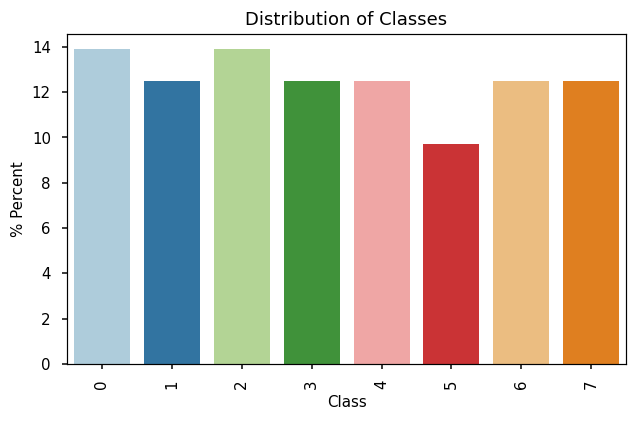

In [ ]:

plt.figure(figsize=(6,4), dpi=108)
sns.barplot(x="class", y="class", data=data, palette=palette,
            estimator=lambda x: len(x) / len(data) * 100)
plt.ylabel('% Percent', fontsize=10)
plt.xlabel('Class', fontsize=10)
plt.xticks(rotation='vertical')
plt.title("Distribution of Classes", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Helper code

def performance_evaluate(classifier, x_train, y_train, x_test, y_test, 
                          cm_suptitle='Confusion Matrix', cmap_color='Greys'):

  # Prediction
  y_train_pred = classifier.predict(x_train)
  y_test_pred = classifier.predict(x_test)

  print("-"*100)
  # Accuracy
  accuracy = (round(balanced_accuracy_score(y_train, y_train_pred), 4), 
              round(balanced_accuracy_score(y_test, y_test_pred), 4))
  print("Accuracy")
  print(f"\tTrain: {accuracy[0]}\tTest: {accuracy[1]}\n")

  print("-"*100)
  # F1 micro Score
  f1_micro = (round(f1_score(y_train, y_train_pred, average='micro'), 4), 
              round(f1_score(y_test, y_test_pred , average='micro'), 4))
  print("F1 micro Score")
  print(f"\tTrain: {f1_micro[0]}\tTest: {f1_micro[1]}\n")

  print("-"*100)
  # F1 macro Score
  f1_macro = (round(f1_score(y_train, y_train_pred, average='macro'),4), 
              round(f1_score(y_test, y_test_pred , average='macro'),4))
  print("F1 macro Score")
  print(f"\tTrain: {f1_macro[0]}\tTest: {f1_macro[1]}\n")

  print("-"*100)
  # Confusion Matrix
  fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=108, sharey=True)
  fig.suptitle(cm_suptitle, fontsize=18)

  cm1 = confusion_matrix(y_train, y_train_pred)
  sns.heatmap(cm1, annot=True,fmt="d",cmap=cmap_color, ax=axes[0])
  axes[0].set_title('Train')
  axes[0].set(xlabel="Predicted", ylabel = "Actual")

  cm2 = confusion_matrix(y_test, y_test_pred)
  sns.heatmap(cm2, annot=True,fmt="d",cmap=cmap_color, ax=axes[1])
  axes[1].set_title('Test')
  axes[1].set(xlabel="Predicted", ylabel = "Actual")  

  return accuracy, f1_micro, f1_macro


In [ ]:
rf_params={
    'bootstrap': [True],
    'max_depth': [5, 10, 20],
    'max_features': ['sqrt'],
    'min_samples_leaf': [4, 7],
    'n_estimators': [500, 1000, 1500]}

In [ ]:
rf=RandomForestClassifier(n_jobs=-1)

gscv = GridSearchCV(rf, param_grid=rf_params, n_jobs=-1, verbose=2).\
                    fit(x_train, y_train)

gscv.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  4.2min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'n_estimators': 500}

----------------------------------------------------------------------------------------------------
Accuracy
	Train: 1.0	Test: 0.9837

----------------------------------------------------------------------------------------------------
F1 micro Score
	Train: 1.0	Test: 0.9846

----------------------------------------------------------------------------------------------------
F1 macro Score
	Train: 1.0	Test: 0.9844

----------------------------------------------------------------------------------------------------


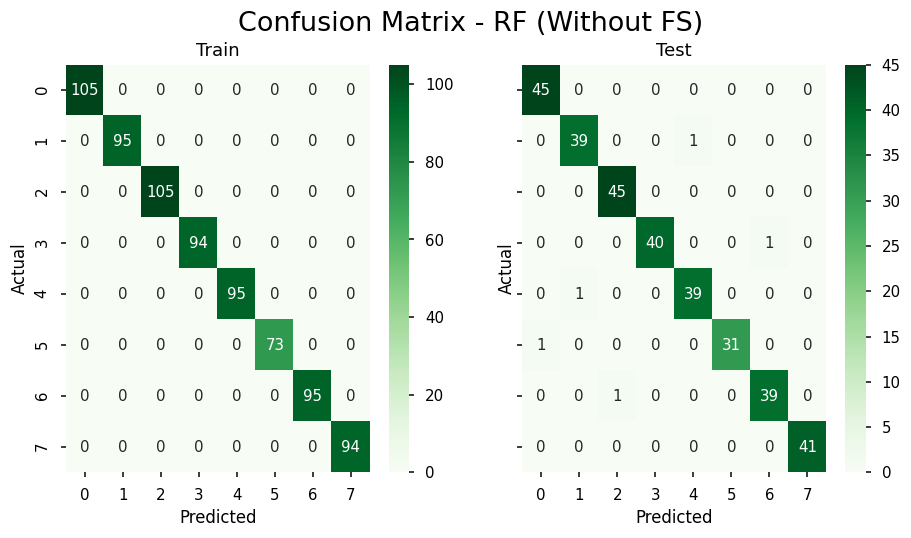

In [ ]:
rf = RandomForestClassifier(bootstrap=gscv.best_params_['bootstrap'], 
                        max_depth=gscv.best_params_['max_depth'], 
                        max_features=gscv.best_params_['max_features'],
                        min_samples_leaf=gscv.best_params_['min_samples_leaf'],
                        n_estimators=gscv.best_params_['n_estimators'], n_jobs=-1).\
                        fit(x_train, y_train)

cm_suptitle='Confusion Matrix - RF (Without FS)'
cmap_color='Greens'

rf_acc, rf_micro, rf_macro = performance_evaluate(rf, x_train, y_train, 
                                                 x_test, y_test, 
                                                 cm_suptitle, cmap_color)

## Selecting subset features (columns) based on feature importance

In [ ]:
subset_value = np.int(np.sqrt(77/2))*6

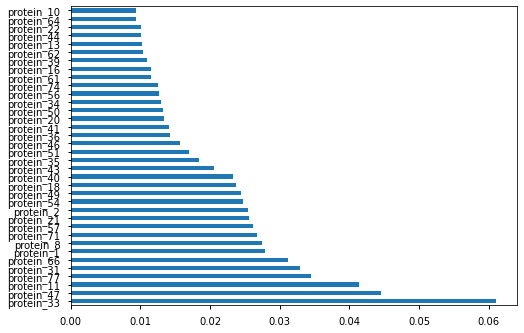

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=data.columns[:-1])
feat_importances.nlargest(subset_value).plot(kind='barh')

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=np.arange(len(data.columns[:-1])))

In [ ]:
top_features = feat_importances.sort_values(ascending=False)[:subset_value]
x_train_subset = x_train[:, top_features.index]
x_test_subset = x_test[:, top_features.index]

In [ ]:
x_test_subset.shape

(324, 36)

----------------------------------------------------------------------------------------------------
Accuracy
	Train: 1.0	Test: 0.9775

----------------------------------------------------------------------------------------------------
F1 micro Score
	Train: 1.0	Test: 0.9784

----------------------------------------------------------------------------------------------------
F1 macro Score
	Train: 1.0	Test: 0.9783

----------------------------------------------------------------------------------------------------


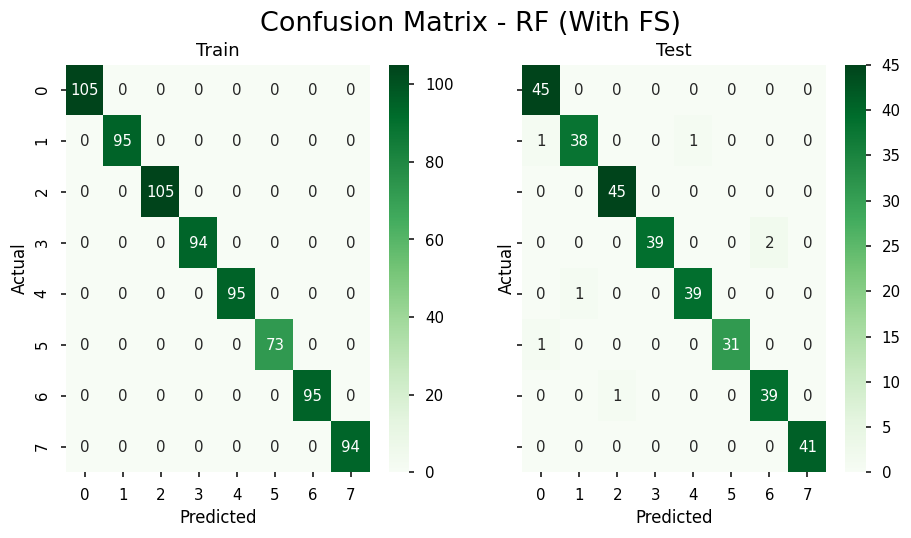

In [ ]:
rf = RandomForestClassifier(bootstrap=gscv.best_params_['bootstrap'], 
                        max_depth=gscv.best_params_['max_depth'], 
                        max_features=gscv.best_params_['max_features'],
                        min_samples_leaf=gscv.best_params_['min_samples_leaf'],
                        n_estimators=gscv.best_params_['n_estimators'], n_jobs=-1).\
                        fit(x_train_subset, y_train)

cm_suptitle='Confusion Matrix - RF (With FS)'
cmap_color='Greens'

rf_acc_fs, rf_micro_fs, rf_macro_fs = performance_evaluate(rf, 
                                                           x_train_subset, y_train, 
                                                           x_test_subset, y_test,
                                                           cm_suptitle, 
                                                           cmap_color)


In [ ]:
params = {'loss': ['hinge'], 
          'penalty': ['l1', 'l2', 'elasticnet'],
          'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'class_weight': ['balanced'],
          'max_iter':[250, 500]}

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.6s finished


{'alpha': 0.0001, 'class_weight': 'balanced', 'loss': 'hinge', 'max_iter': 500, 'penalty': 'elasticnet'} 

----------------------------------------------------------------------------------------------------
Accuracy
	Train: 0.9987	Test: 0.9691

----------------------------------------------------------------------------------------------------
F1 micro Score
	Train: 0.9987	Test: 0.9691

----------------------------------------------------------------------------------------------------
F1 macro Score
	Train: 0.9987	Test: 0.9684

----------------------------------------------------------------------------------------------------


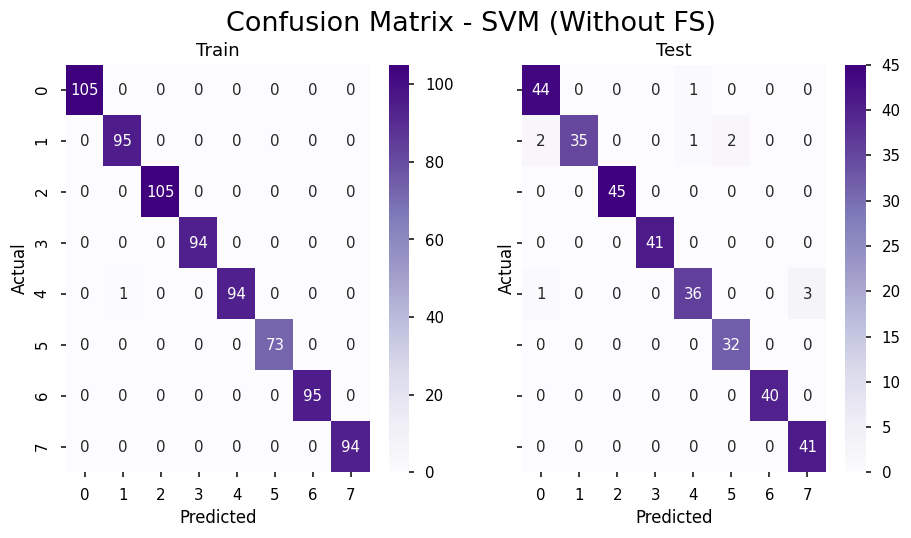

In [ ]:
sgd_svm = SGDClassifier(n_jobs=-1, early_stopping=False)

gsv = GridSearchCV(sgd_svm, param_grid=params, n_jobs=-1, cv=5, verbose=2)

gsv.fit(x_train, y_train)

print(gsv.best_params_, "\n")

sgd_svm = SGDClassifier(alpha=gsv.best_params_['alpha'], 
                        loss=gsv.best_params_['loss'], 
                        penalty=gsv.best_params_['penalty'],
                        max_iter=gsv.best_params_['max_iter'],
                        class_weight=gsv.best_params_['class_weight'],
                        n_jobs=-1, early_stopping=False).\
                        fit(x_train, y_train)


svm_acc, svm_micro, svm_macro = performance_evaluate(sgd_svm, 
                                                     x_train, y_train,
                                                     x_test, y_test,
                                                     cm_suptitle='Confusion Matrix - SVM (Without FS)', 
                                                     cmap_color='Purples')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.8s finished


{'alpha': 0.0001, 'class_weight': 'balanced', 'loss': 'hinge', 'max_iter': 500, 'penalty': 'l1'} 

---------------------------------------------------------------------------------------------------- 

----------------------------------------------------------------------------------------------------
Accuracy
	Train: 0.9922	Test: 0.9664

----------------------------------------------------------------------------------------------------
F1 micro Score
	Train: 0.9921	Test: 0.966

----------------------------------------------------------------------------------------------------
F1 macro Score
	Train: 0.9923	Test: 0.9656

----------------------------------------------------------------------------------------------------


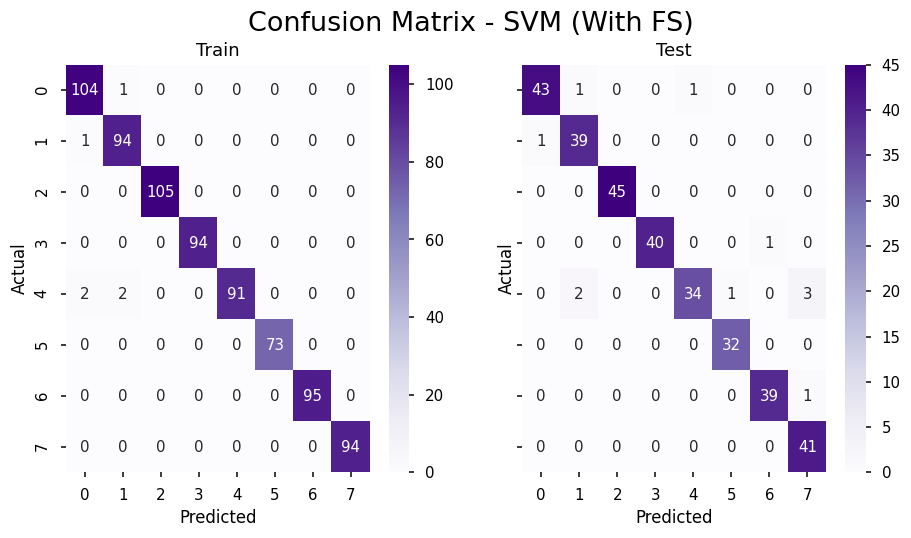

In [ ]:
sgd_svm = SGDClassifier(n_jobs=-1, early_stopping=False)

gsv = GridSearchCV(sgd_svm, param_grid=params, n_jobs=-1, cv=5, verbose=2)

gsv.fit(x_train_subset, y_train)

print(gsv.best_params_, "\n")
print("-"*100, "\n")

sgd_svm = SGDClassifier(alpha=gsv.best_params_['alpha'], 
                        loss=gsv.best_params_['loss'], 
                        penalty=gsv.best_params_['penalty'],
                        max_iter=gsv.best_params_['max_iter'],
                        class_weight=gsv.best_params_['class_weight'],
                        n_jobs=-1, early_stopping=False).\
                        fit(x_train_subset, y_train)

cm_suptitle='Confusion Matrix - SVM (With FS)'
cmap_color='Purples'

svm_acc_fs, svm_micro_fs, svm_macro_fs = performance_evaluate(sgd_svm, 
                                                              x_train_subset, y_train,
                                                              x_test_subset, y_test,
                                                              cm_suptitle, 
                                                              cmap_color)


In [ ]:
params = {'loss': ['log'], 
          'penalty': ['l1', 'l2'],
          'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'class_weight': ['balanced'],
          'max_iter':[250, 500]}

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    8.5s finished


{'alpha': 0.0001, 'class_weight': 'balanced', 'loss': 'log', 'max_iter': 500, 'penalty': 'l1'} 

----------------------------------------------------------------------------------------------------
Accuracy
	Train: 0.9935	Test: 0.9513

----------------------------------------------------------------------------------------------------
F1 micro Score
	Train: 0.9934	Test: 0.9506

----------------------------------------------------------------------------------------------------
F1 macro Score
	Train: 0.9936	Test: 0.9512

----------------------------------------------------------------------------------------------------


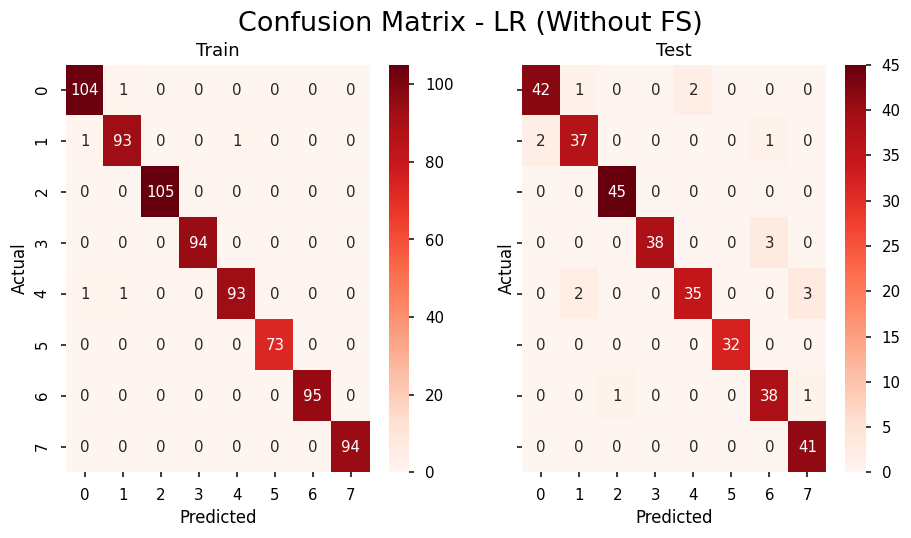

In [ ]:
sgd_log = SGDClassifier(n_jobs=-1, early_stopping=False)

gsv = GridSearchCV(sgd_log, param_grid=params, n_jobs=-1, cv=5, verbose=2)

gsv.fit(x_train_subset, y_train)

print(gsv.best_params_, "\n")

sgd_log = SGDClassifier(alpha=gsv.best_params_['alpha'], 
                        loss=gsv.best_params_['loss'], 
                        penalty=gsv.best_params_['penalty'],
                        max_iter=gsv.best_params_['max_iter'],
                        class_weight=gsv.best_params_['class_weight'],
                        n_jobs=-1, early_stopping=False).\
                        fit(x_train_subset, y_train)

cm_suptitle='Confusion Matrix - LR (Without FS)'
cmap_color='Reds'

log_acc, log_micro, log_macro = performance_evaluate(sgd_log, 
                                                     x_train_subset, y_train,
                                                     x_test_subset, y_test,
                                                     cm_suptitle, 
                                                     cmap_color)


In [ ]:
sgd_log = SGDClassifier(n_jobs=-1, early_stopping=False)

gsv = GridSearchCV(sgd_log, param_grid=params, n_jobs=-1, cv=5, verbose=2)

gsv.fit(x_train_subset, y_train)

print(gsv.best_params_, "\n")
print("-"*100)

sgd_log = SGDClassifier(alpha=gsv.best_params_['alpha'], 
                        loss=gsv.best_params_['loss'], 
                        penalty=gsv.best_params_['penalty'],
                        max_iter=gsv.best_params_['max_iter'],
                        class_weight=gsv.best_params_['class_weight'],
                        n_jobs=-1, early_stopping=False).\
                        fit(x_train_subset, y_train)

cm_suptitle='Confusion Matrix - LR (With FS)'
cmap_color='Reds'

log_acc_fs, log_micro_fs, log_macro_fs = performance_evaluate(sgd_log, 
                                                              x_train_subset, y_train,
                                                              x_test_subset, y_test,
                                                              cm_suptitle, 
                                                              cmap_color)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
summary = {
    'Model' : ['Random Forest', 'SVM-SGD', 'LR-SGD'],
           
    'F1 Micro Score (train, test)': [rf_micro, svm_micro, log_micro],

    'F1 Micro Score FS  (train, test)': [rf_micro_fs, svm_micro_fs, log_micro_fs],

    'F1 Macro Score (train, test)': [rf_macro, svm_macro, log_macro],

    'F1 Macro Score FS (train, test)': [rf_macro_fs, svm_macro_fs, log_macro_fs],

    'Accuracy (train, test)': [rf_acc, svm_acc, log_acc],

    'Accuracy FS (train, test)': [rf_acc_fs, svm_acc_fs, log_acc_fs]
}

In [ ]:
summary = pd.DataFrame(summary)
summary

In [ ]:

end=datetime.now()

print(f"Time took to run whole Notebook - {end-start} (mins).")